| Question                                                                                                 | Can it answer? | New relations? | New opportunities? |
| -------------------------------------------------------------------------------------------------------- | -------------- | -------------- | ------------------ |
| Is the handover regular among doctors?                                                               |                |                |                    |
| What is the quality of the handover in its current unstructured form when compared to the SBAR standard? |                |                |                    |
| Is handover attended by all members of junior staff?                                                     |                |                |                    |
| What are reasons for delayed/interrupted handover?                                                       |                |                |                    |
| What are the preferred methods of handover among junior doctors?                                         |                |                |                    |
| Does the choice of handover method impact its quality?                                                   |                |                |                    |

In [21]:
import pandas as pd

# pre-filtering to junior docs - annoyingly need to call it df as replacemnet not working as attended

df = pd.read_excel(r'C:\Users\abdul.wasay\Documents\minal_ahmad\Data form (Responses).xlsx', engine='openpyxl')
all_doctors = df
df = df[df['Designation of Antendees'].str.contains('SHO, FY2', na=False)]

In [22]:


# Assuming junior_docs is your DataFrame
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype('string')
# Verify the conversion
print("\n\n dtypes:\n\n",df.dtypes)
df.describe()




 dtypes:

 Timestamp                                   datetime64[ns]
Date                                        datetime64[ns]
Handover Type                               string[python]
Method of delivering information            string[python]
Time at the start of Handover               string[python]
Time at the end of Handover                 string[python]
No. Of cases discussed                             float64
Total Number of doctors present on shift           float64
Number of staff attending                          float64
Designation of doctor presenting            string[python]
Designation of Antendees                    string[python]
Absent from meeting                         string[python]
Description of SITUATION                    string[python]
Description of BACKGROUND                   string[python]
Description of ASSESSMENT                   string[python]
Description of RECOMMENDATION               string[python]
Interruption during handover               

C:\Users\abdul.wasay\AppData\Local\Temp\ipykernel_24176\1050664192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('string')


,Timestamp,Date,No. Of cases discussed,Total Number of doctors present on shift,Number of staff attending
count,21,21,20.000000,21.000000,21.000000
mean,2024-10-13 01:44:39.737285888,2024-08-18 00:00:00,26.700000,8.142857,6.857143
min,2024-08-14 16:38:49.777000,2024-08-08 00:00:00,4.000000,3.000000,3.000000
25%,2024-09-16 18:43:35.940999936,2024-08-12 00:00:00,10.750000,7.000000,6.000000
50%,2024-11-01 03:25:57.028000,2024-08-18 00:00:00,34.000000,9.000000,7.000000
75%,2024-11-08 01:13:22.823000064,2024-08-23 00:00:00,36.000000,10.000000,8.000000
max,2024-11-08 12:47:17.684000,2024-08-29 00:00:00,60.000000,12.000000,10.000000
std,NaN,NaN,15.911267,2.351291,2.080522


In [23]:
print("nulls? \n\n", df.isnull().sum(),"\n\nduplications? \n\n" ,df.duplicated().sum())

nulls? 

 Timestamp                                   0
Date                                        0
Handover Type                               0
Method of delivering information            0
Time at the start of Handover               0
Time at the end of Handover                 0
No. Of cases discussed                      1
Total Number of doctors present on shift    0
Number of staff attending                   0
Designation of doctor presenting            0
Designation of Antendees                    0
Absent from meeting                         6
Description of SITUATION                    0
Description of BACKGROUND                   0
Description of ASSESSMENT                   0
Description of RECOMMENDATION               0
Interruption during handover                9
dtype: int64 

duplications? 

 0


C:\Users\abdul.wasay\AppData\Local\Temp\ipykernel_24176\2436049726.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_dt'] = pd.to_datetime(df['Time at the start of Handover'])
C:\Users\abdul.wasay\AppData\Local\Temp\ipykernel_24176\2436049726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_dt'] = pd.to_datetime(df['Time at the start of Handover'])
C:\Users\abdul.wasay\AppData\Local\Temp\ipykernel_24176\2436049726.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please s

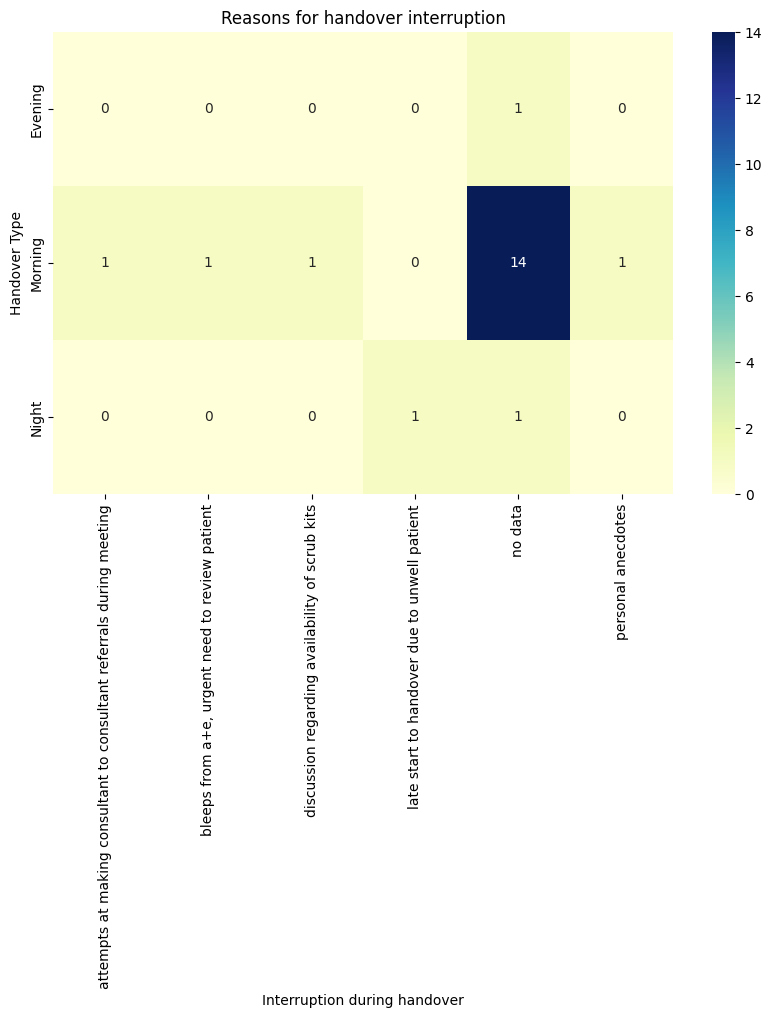

In [24]:
import datetime as dt
import seaborn as sns

from matplotlib import pyplot as plt

df['start_dt'] = pd.to_datetime(df['Time at the start of Handover'])
df['end_dt'] = pd.to_datetime(df['Time at the end of Handover'])
df['Duration between handovers'] = df['end_dt'] - df['start_dt']
df.columns

# Clean data in 'Interruption during handover' column
df['Interruption during handover'] = df['Interruption during handover'].str.strip().str.lower().fillna('no data')
df['Interruption during handover'] = df['Interruption during handover'].replace(['nil', 'none'], 'no data')
# Ensure 'Interruption during handover' column contains strings
df['Interruption during handover'] = df['Interruption during handover'].astype(str)

# Create a histogram showing a simple count of reasons given or not
# Create a crosstab to visualize the count of interruptions by handover type
interruption_matrix = pd.crosstab(df['Handover Type'], df['Interruption during handover'])

# Plot the matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(interruption_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Interruption during handover')
plt.ylabel('Handover Type')
plt.title('Reasons for handover interruption')
plt.show()

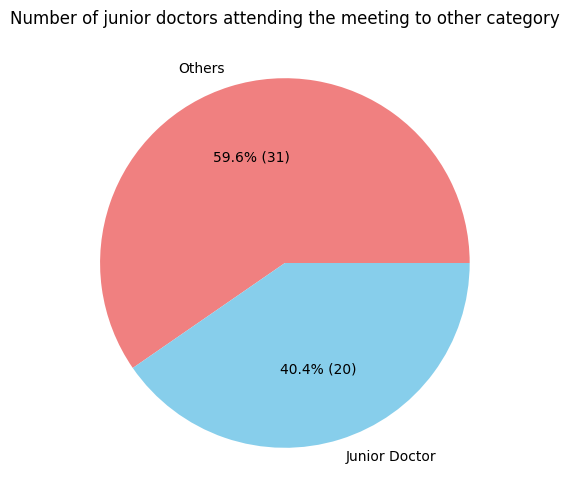

In [44]:
import matplotlib.pyplot as plt

# Count the rows containing 'SHO, FY2' and those without this criteria
sho_fy2_count = all_doctors['Designation of Antendees'].str.contains('SHO, FY2', na=False).value_counts()

# Calculate the percentage of each count
sho_fy2_percentage = sho_fy2_count / sho_fy2_count.sum() * 100

# Plot the pie chart with percentage and count
plt.figure(figsize=(8, 6))
plt.pie(sho_fy2_count, labels=['Others', 'Junior Doctor'], autopct=lambda p: f'{p:.1f}% ({int(p * sho_fy2_count.sum() / 100)})', colors=['lightcoral', 'skyblue'])
plt.title('Number of junior doctors attending the meeting to other category')

# Add legend
plt.show()


C:\Users\abdul.wasay\AppData\Local\Temp\ipykernel_24176\583743952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delayed'] = df['start_dt'].dt.minute != 0


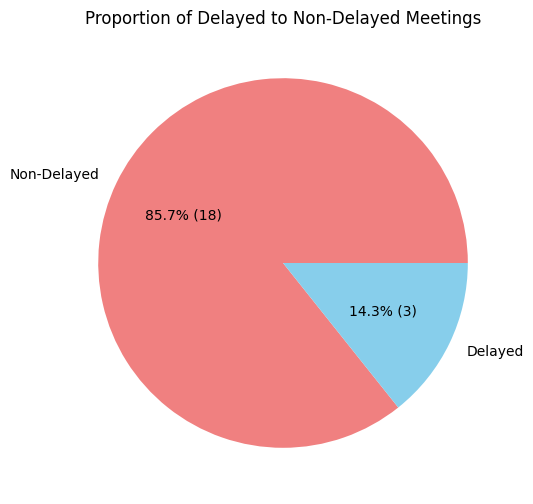

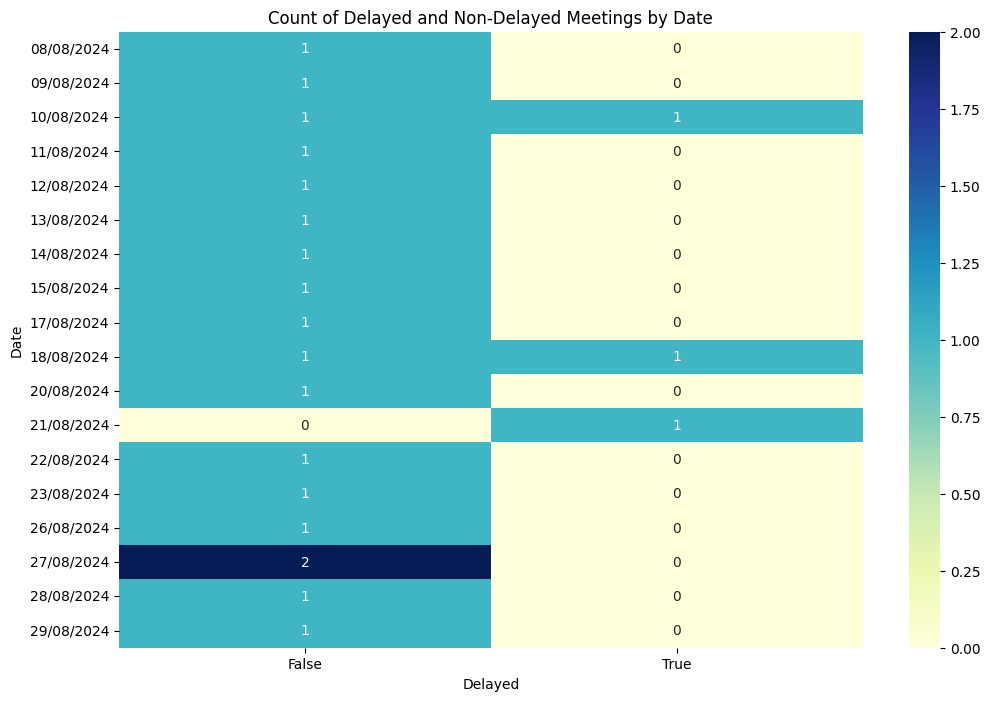

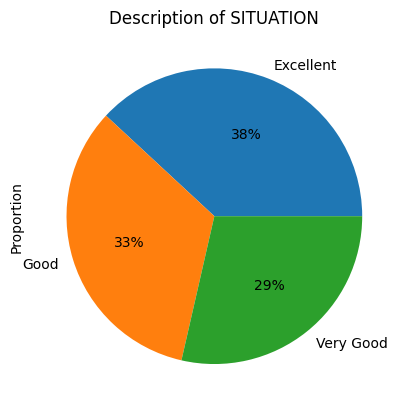

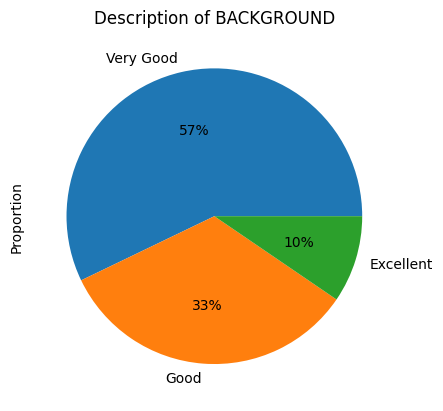

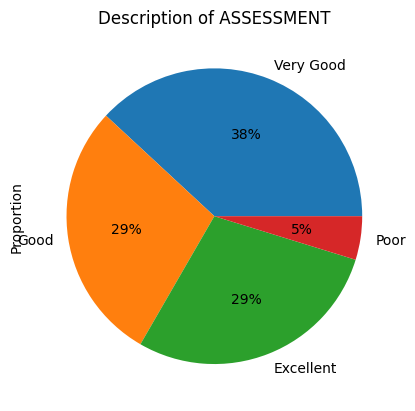

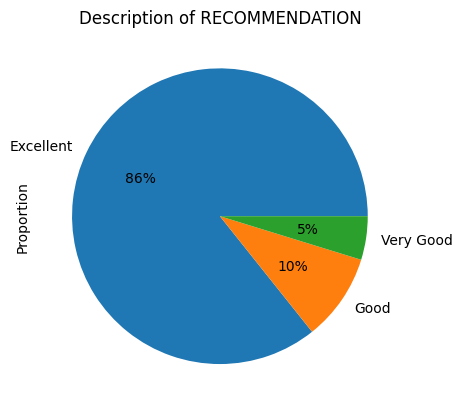

In [50]:


# Add boolean column that if the column time is delayed from o'clock mark, then it is true else false

# Add boolean column that if the column time is delayed from o'clock mark, then it is true else false
# Add boolean column that if the column time is delayed from o'clock mark, then it is true else false
df['Delayed'] = df['start_dt'].dt.minute != 0

# Calculate the proportion of delayed to non-delayed
delayed_counts = df['Delayed'].value_counts()
delayed_percentage = delayed_counts / delayed_counts.sum() * 100

# Plot the pie chart with percentage and count
plt.figure(figsize=(8, 6))
plt.pie(delayed_counts, labels=['Non-Delayed', 'Delayed'], autopct=lambda p: f'{p:.1f}% ({int(p * delayed_counts.sum() / 100)})', colors=['lightcoral', 'skyblue'])
plt.title('Proportion of Delayed to Non-Delayed Meetings')
plt.show()

# Plot the timestamps of delayed meetings
# Create a crosstab to visualize the count of delayed and non-delayed meetings by date
delayed_matrix = pd.crosstab(df['Date'].dt.strftime('%d/%m/%Y'), df['Delayed'])

# Plot the matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(delayed_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Delayed')
plt.ylabel('Date')
plt.title('Count of Delayed and Non-Delayed Meetings by Date')
plt.show()

description_columns = [col for col in df.columns if 'Description' in col]
for col in description_columns:
    (df[col].value_counts(normalize=True) * 100).plot(kind='pie', title=col, autopct='%1.00f%%')
    plt.ylabel('Proportion')
    plt.show()

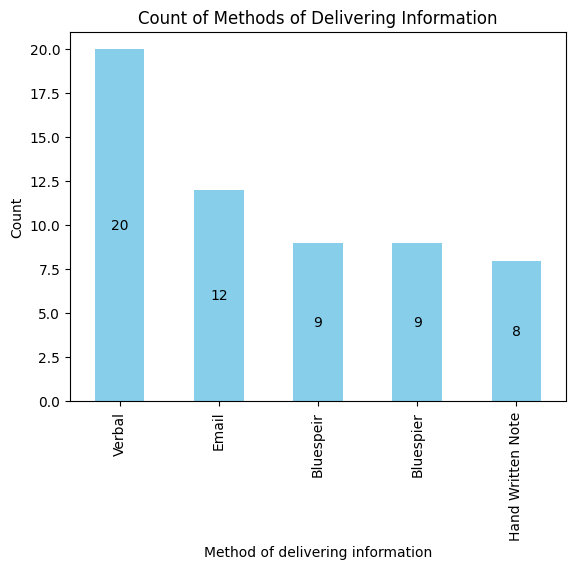

In [27]:
# Split the 'Method of delivering information' column into separate rows
methods_df = df.assign(Method=df['Method of delivering information'].str.split(',')).explode('Method')
methods_df['Method'] = methods_df['Method'].str.strip()

# Count the occurrences of each method
method_counts = methods_df['Method'].value_counts()

# Plot the counts as a histogram
ax = method_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Method of delivering information')
plt.ylabel('Count')
plt.title('Count of Methods of Delivering Information')

# Show the number on top of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center')

plt.show()

In [28]:
folder_path = '.'

# Save the heatmap plot from cell 4
plt.figure(figsize=(10, 6))
sns.heatmap(interruption_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Interruption during handover')
plt.ylabel('Handover Type')
plt.title('Reasons for handover interruption')
plt.savefig(f'{folder_path}/heatmap_interruption_matrix.png')
plt.close()

# Save the bar plot from cell 5
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Designation of Antendees')
plt.ylabel('Count of handovers')
plt.title('Count of Designation of Antendees')
plt.savefig(f'{folder_path}/barplot_designation_of_antendees.png')
plt.close()

# Save the pie charts from cell 6
for col in description_columns:
    (df[col].value_counts(normalize=True) * 100).plot(kind='pie', title=col, autopct='%1.00f%%')
    plt.ylabel('Proportion')
    plt.savefig(f'{folder_path}/piechart_{col}.png')
    plt.close()

# Save the bar plot from cell 7
method_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Method of delivering information')
plt.ylabel('Count')
plt.title('Count of Methods of Delivering Information')
plt.savefig(f'{folder_path}/barplot_methods_of_delivering_information.png')
plt.close()

In [ ]:
'''
Can you make a row chart for the meeting attendance for just junior doctors against their strength on shift? 

I just want to see how many junior doctors attended how many meetings. 
'''


''